# H vs DT plots used in the paper using short and long equation 
**Following Holmes. et al 2009, the at Ts-Ta =0 H should be zero by forcing intercept**

In [3]:
from __future__ import division
from IPython.display import display
from sympy import diff, init_printing
init_printing() 
init_printing(use_latex='mathjax')
from sympy import diff, Eq, exp, init_printing, log, solve, sqrt
init_printing() 
from sympy.printing import StrPrinter
StrPrinter._print_Quantity = lambda self, expr: str(expr.abbrev)    # displays short units (m instead of meter)

In [4]:
# Using environmental science for symbolic math, see https://github.com/environmentalscience/essm
from essm.variables._core import BaseVariable, Variable
from essm.equations import Equation
from essm.equations.physics.thermodynamics import *
from essm.variables.units import derive_unit, SI, Quantity
from essm.variables.utils import replace_defaults, replace_variables
from sympy.physics.units import joule, kelvin,gram,kilogram,meter, mole, pascal, second
from essm.variables.utils import generate_metadata_table
from matplotlib import rc 
import matplotlib
import math
import sympy
from essm.variables.units import derive_unit, derive_baseunit, markdown, SI
from essm.variables.units import joule, kelvin, kilogram, meter, pascal, second, watt

from sympy import diff, Eq, exp, init_printing, log, solve, sqrt
import re


In [5]:
import numpy as np
from netCDF4 import Dataset
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sys
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [6]:
import glob
from netCDF4 import Dataset
import os
from sympy.printing.theanocode import theano_function

## Plot Path :

In [7]:
plt_path= '../plots'


## Brookings

In [8]:
filename = '../Data/fluxnet/AMF_US-Bkg_BASE_HH_4-1.csv'
brookframe = pd.read_csv(filename, error_bad_lines=False,  na_values=-9999, skiprows= 2)
           

In [9]:
brookframerang = pd.date_range('1/1/2004 00:00', periods=len(brookframe.index), freq='30min')
brookframe.index = brookframerang
brookframe=brookframe.replace(-9999.000000, np.nan)
brookframe["T_a"] = pd.Series(brookframe.TA + 273.15, index=brookframe.index)
brookframe['Fn']=brookframe.NETRAD
brookframe['Ws']=brookframe.WS
brookframe['Flu']=brookframe.LW_OUT
brookframe['Fld']=brookframe.LW_IN
brookframe['Fh']=brookframe.H
#brookframe

## Yatir

In [10]:
filename = '../Data/fluxnet/EFDC_L2_Flx_ILYat_2005_v03_30m.txt'

yatframe = pd.read_csv(filename, error_bad_lines=False,  na_values=-9999)
                      


In [11]:
yatframerang = pd.date_range('1/1/2005 00:00', periods=len(yatframe.index), freq='30min')
yatframe.index = yatframerang
yatframe=yatframe.replace(-9999.000000, np.nan)
yatframe["T_a"] = pd.Series(yatframe.TA + 273.15, index=yatframe.index)
yatframe['Fn']=yatframe.NETRAD
yatframe['Ws']=yatframe.WS
yatframe['Flu']=yatframe.LW_OUT
yatframe['Fld']=yatframe.LW_IN
yatframe['Fh']=yatframe.H

## Alice Spring:

In [12]:
AS = '../Data/tern/AS/' 
ASncfile = xr.open_mfdataset(AS +'/*.nc', combine='by_coords')#, combine='nested')

In [13]:
#ASncfile.info()

sitename = [ASncfile,HSncfile]
for site in sitename:
    canopy_height=site.canopy_height
    print(canopy_height)
#canopy_height=ASncfile.canopy_height
#print(canopy_height)
#'canopy_height_{0}'.format(str(sitename))=ASncfile.canopy_height
####
anopy_ht_as=ASncfile.canopy_height
can_ht=re.findall(r'\d*\.?\d+',canopy_ht_as)
can_ht=float(can_ht[0])
tower_ht=ASncfile.tower_height
wind_measure_ht = 9.25
humidi_measure_ht=11.25
k=0.667
d=(k*can_ht)
zom_as = 0.123 * can_ht
zoh_as=0.1*zom_as
print(zoh_as)

### dataframe

In [14]:
ASncfile.canopy_height

'6.5m'

In [15]:

asframe= ASncfile.to_dataframe()
asframe.index=asframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
asframe.reset_index(inplace=True)
asframe.index=asframe.time 
asframe=asframe[(asframe.Ws_QCFlag==00)&(asframe.Fld_QCFlag==00)&(asframe.Flu_QCFlag==00)&(asframe.Fh_QCFlag==00)
               &(asframe.Ta_QCFlag==00)]
asframe=asframe.replace(-9999.000000, np.nan)
asframe["T_a"] = pd.Series(asframe.Ta + 273.15, index=asframe.index)


#asframe

In [16]:
#asframe.ustar

In [17]:
#df=asframe[(asframe.index.year == 2016) & (asframe.index.month == 1)&(asframe.Fn > 25)  & (asframe.Ws > 2)]
#print(df.ustar,df.Ws)

In [18]:
#print(aero_res_as.resample('M').median())

## Howard Spring

In [19]:
HS = '../Data/tern/HS/' 
HSncfile = xr.open_mfdataset(HS +'/*.nc',combine='by_coords')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [20]:
#HSncfile.info()

### vdict Howards spring:

In [21]:
hsframe= HSncfile.to_dataframe()
hsframe.index=hsframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
hsframe.reset_index(inplace=True)
hsframe.index=hsframe.time 
hsframe=hsframe[(hsframe.Fn_QCFlag==00)&(hsframe.Fld_QCFlag==00)&(hsframe.Flu_QCFlag==00)&(hsframe.Ta_QCFlag==00)&(hsframe.Fh_QCFlag==00)]
hsframe=hsframe.replace(-9999.000000, np.nan)
hsframe["T_a"] = pd.Series(hsframe.Ta + 273.15, index=hsframe.index)




/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

In [22]:
#print(aero_res_hs.resample('M').median())

## Tumarumba:

In [23]:
Tum = '../Data/tern/TUM/' 
Tumncfile = xr.open_mfdataset(Tum+'/*.nc',combine='by_coords')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


### Tum Vdict:

In [24]:
#Tumncfile.info()

In [25]:
tumframe= Tumncfile.to_dataframe()
tumframe.index=tumframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
tumframe.reset_index(inplace=True)
tumframe.index=tumframe.time
tumframe=tumframe[(tumframe.Ws_QCFlag==00)&(tumframe.Fld_QCFlag==00)&(tumframe.Flu_QCFlag==00)&(tumframe.Fh_QCFlag==00)&(tumframe.Ta_QCFlag==00)]
tumframe=tumframe.replace(-9999.000000, np.nan)
tumframe["T_a"] = pd.Series(tumframe.Ta + 273.15, index=tumframe.index)



/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

In [26]:
#tumframe

## Sturt Plains:

In [27]:
SP = '../Data/tern/sturt_plains/'
Spncfile = xr.open_mfdataset(SP +'/*.nc', combine='by_coords' )

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

### sp vdict

In [28]:
spframe= Spncfile.to_dataframe()
can_ht_sp=Spncfile.canopy_height
spframe.index=spframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
spframe.reset_index(inplace=True)
spframe.index=spframe.time
spframe=spframe[(spframe.Ws_QCFlag==00)&(spframe.Fld_QCFlag==00)&(spframe.Flu_QCFlag==00)&(spframe.Fh_QCFlag==00)&(spframe.Ta_QCFlag==00)]
spframe=spframe.replace(-9999.000000, np.nan)
spframe["T_a"] = pd.Series(spframe.Ta + 273.15, index=spframe.index)


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

## Litchfield:

In [29]:
LF= '../Data/tern/litchfield/' 
LFncfile = xr.open_mfdataset(LF +'/*.nc')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future defa

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

### vdict LF

In [30]:
lfframe= LFncfile.to_dataframe()
lfframe.index=lfframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
lfframe.reset_index(inplace=True)
lfframe.index=lfframe.time
lfframe=lfframe[(lfframe.Ws_QCFlag==00)&(lfframe.Fld_QCFlag==00)&(lfframe.Flu_QCFlag==00)&(lfframe.Fh_QCFlag==00)&(lfframe.Ta_QCFlag==00)]
lfframe=lfframe.replace(-9999.000000, np.nan)
lfframe["T_a"] = pd.Series(lfframe.Ta + 273.15, index=lfframe.index)


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

In [31]:
#df_lf

## adelaide River:

In [32]:
AR = '../Data/tern/AdelaideRiver/' 

ARncfile = xr.open_mfdataset(AR +'/*.nc')  #,combine='nested')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


### Vdict ar

In [33]:
arframe= ARncfile.to_dataframe()
arframe.index=arframe.index.set_names(['Time'])#'latitute', 'longitute'
arframe.reset_index(inplace=True)
arframe['timestamp']= pd.to_datetime(arframe[['Year' ,'Month','Day','Hour','Minute','Second']])
arframe.index=arframe.timestamp
arframe=arframe[(arframe.Ws_CSAT_QCFlag==00)&(arframe.Fld_QCFlag==00)&(arframe.Flu_QCFlag==00)&(arframe.Fh_QCFlag==00)&(arframe.Ta_QCFlag==00)]
arframe=arframe.replace(-9999.000000, np.nan)
arframe["T_a"] = pd.Series(arframe.Ta + 273.15, index=arframe.index)
arframe["Ws"] = arframe.Ws_CSAT



In [34]:
#arframe

##  Titree

In [35]:
Titree = '../Data/tern/Ti_tree/' 
TTncfile = xr.open_mfdataset(Titree +'/*.nc') #, concat_dim= 'ensemble')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will 

In [36]:
titreeframe= TTncfile.to_dataframe()
titreeframe.index=titreeframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
titreeframe.reset_index(inplace=True)
titreeframe.index=titreeframe.time 
titreeframe=titreeframe[(titreeframe.Ws_QCFlag==00)&(titreeframe.Fld_QCFlag==00)&(titreeframe.Flu_QCFlag==00)&(titreeframe.Fh_QCFlag==00)&(titreeframe.Ta_QCFlag==00)]#&(titreeframe.Fn_QCFlag==00)&(titreeframe.Ws_QCFlag==00)]
titreeframe=titreeframe.replace(-9999.000000, np.nan)
titreeframe["T_a"] = pd.Series(titreeframe.Ta + 273.15, index=titreeframe.index)


## Dalyuncleared

In [37]:
dalyunc = '../Data/tern/dalyuncleared/'
dalyuncncfile = xr.open_mfdataset(dalyunc +'/*.nc',compat='override',coords='all')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future defa

In [38]:
dalyuncframe= dalyuncncfile.to_dataframe()
dalyuncframe.index=dalyuncframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
dalyuncframe.reset_index(inplace=True)
dalyuncframe.index=dalyuncframe.time 
dalyuncframe=dalyuncframe[(dalyuncframe.Ws_QCFlag==00)&(dalyuncframe.Fld_QCFlag==00)&(dalyuncframe.Flu_QCFlag==00)&(dalyuncframe.Fh_QCFlag==00)&(dalyuncframe.Ta_QCFlag==00)]#&(dalyuncframe.Fn_QCFlag==00)&(dalyuncframe.Ws_CSAT_QCFlag==00)]
dalyuncframe=dalyuncframe.replace(-9999.000000, np.nan)
dalyuncframe["T_a"] = dalyuncframe.Ta + 273.15


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

## variable def:

In [39]:
class epsilon (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon'
    #default = 0.9

        
class sigma (Variable):
    """ stefan-boltzmann constant""" 
    unit =  watt/(meter**2 * kelvin**4)
    latex_name ='\sigma'
    default = 5.6704 * 10**-8


class T_s(Variable): 
    """Effective surface temperature.""" 
    unit = kelvin 
    latex_name ='T_{s}'
       
    
class T_a(Variable): 
    """Air temperature""" 
    unit = kelvin 
    latex_name ='T_a'   
 
    
class R_lout(Variable): 
    """upwelling longwave""" 
    unit = watt/meter**2
    latex_name ='R_{l,out}'
    #default = Hs.longwave_up
    
    
class H(Variable): 
    """sensible heat""" 
    unit = watt/meter**2
    latex_name ='H'
    
class delta_T(Variable): 
    """difference in surface and air temperature""" 
    unit = kelvin 
    latex_name ='\Delta T'

    

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "essm.variables.physics.thermodynamics:T_a" will be overridden by "__main__:<class '__main__.T_a'>"
  instance[expr] = instance


In [40]:
# calculation of Ts considering both eitted and reflected radiation(Mike)
class R_lin(Variable):
    """Incoming Longwave radiation"""
    latex_name = r'R_{l,in}'
    unit = watt/meter**2
class eq_Rlout_Rlin(Equation):
    """Upwelling longwave radiation including reflected."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4 + (1-epsilon) * R_lin)
eq_Rlout_Rlin

In [41]:
class eq_Ts_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout_Rlin

### SEQ

In [42]:
class eq_Rlout(Equation):
    """Upwelling longwave radiation."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4)
eq_Rlout


In [43]:
class eq_Ts_Rlout(eq_Rlout.definition):
    """Surface temperature as a function of LWout"""
    soln = solve(eq_Rlout, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout

# Plot-scale epsilon using LEQ:

### function

In [44]:

def opteps_RLM (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
    k=0
    epsilon1=np.arange(0.4,1,0.002).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years) & (df_all.index.month == mnth)& 
                (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
        tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        list_H = df.Fh
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a)) 
        
        try:
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_rlm.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_rlm.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
        
        
    df_eps_ref=opteps_rlm.copy()## copying data frame for sorting based on minimum rmse
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0])
        
            

In [45]:
opteps_RLM (2016, spframe,6)

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=broadwell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -msgx -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mrdseed -mprfchw -madx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mclflushopt -mxsavec -mxsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-avx5124fmaps -mno-avx5124vnniw -mno-clwb -mno-mwaitx -mno-clzero -mno-pku -mno-rdpid --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=8192 -mtune=generic -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/numpy/core/include 

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: InplaceDimShuffle{x}(TensorConstant{81.48573330568126})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  

ERROR (theano.gof.opt): node: InplaceDimShuffle{x}(TensorConstant{-0.6})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/cc

ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/cc.py", line 1157, in __compile__
    keep_lock=keep_lock)
  File "/home/th

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=broadwell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -msgx -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mrdseed -mprfchw -madx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mclflushopt -mxsavec -mxsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-avx5124fmaps -mno-avx5124vnniw -mno-clwb -mno-mwaitx -mno-clzero -mno-pku -mno-rdpid --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=8192 -mtune=generic -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/numpy/core/include 

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: InplaceDimShuffle{x}(TensorConstant{81.48573330568126})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  

ERROR (theano.gof.opt): node: InplaceDimShuffle{x}(TensorConstant{-0.6})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/cc

ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/theano/gof/cc.py", line 1157, in __compile__
    keep_lock=keep_lock)
  File "/home/th

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=broadwell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -msgx -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mrdseed -mprfchw -madx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mclflushopt -mxsavec -mxsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-avx5124fmaps -mno-avx5124vnniw -mno-clwb -mno-mwaitx -mno-clzero -mno-pku -mno-rdpid --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=8192 -mtune=generic -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/numpy/core/include 

OSError: [Errno 12] Cannot allocate memory

In [ ]:
def opteps_monthly (site,years, df_all,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    
   
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth) 
                & (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn<25) | (df_all.Ws < 2))]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
    tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        
        
    list_T_s = tf_T_s(df.Fld,df.Flu)
    list_T_s2 = tf_T_s2(df12.Fld,df12.Flu)
    df = df.assign(T_s=list_T_s)
    list_H = df.Fh
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
    df12 = df12.assign(T_s2=list_T_s2)
    list_DT2 = df12.T_s2 - df12.T_a
    df12 = df12.assign(DT2=(df12.T_s2 - df12.T_a))#
   
   
        ####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    #####
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c=float(reg.intercept_)
    y_pred = m*x + c
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                  str(np.round(r2,decimals=eqdigits)),
                                                                  str(np.round(RMSE, decimals=eqdigits)),
                                                                  str(np.round(N, decimals=eqdigits)))

        
        
        
    plt.plot(x,y,"+",label='_nolegend_')
    plt.plot(df12.DT2,df12.Fh,".k",label='_nolegend_')
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('{0},{1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    plt.xticks([-5,0,5,10,15],fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(-5, 17)
    plt.ylim(-50, 500)
    plt.legend(loc="best",fontsize=12)
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

In [ ]:
opteps_monthly ("Strut Plains",2016, spframe,6,0.985)

## Sturt Plains 

In [ ]:
site="Sturt Plains"
df=spframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_sp=[]
list_slope_sp=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_sp.append(opt_eps)
            list_slope_sp.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_sp.append(1)
            list_slope_sp.append(np.nan)

plt.plot(np.arange(len(list_opteps_sp))+1,list_opteps_sp,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq with intercept{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Alice spring

In [ ]:
site="Alice Spring"
df=asframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_as=[]
list_slope_as=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_as.append(opt_eps)
            list_slope_as.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_as.append(np.nan)
            list_slope_as.append(np.nan)

eps_as=np.array(list_opteps_as)## converting into array
eps_as=eps_as[~np.isnan(eps_as)]## removing nan
plt.plot(np.arange(len(eps_as))+1,eps_as[~np.isnan(eps_as)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = '{0},Alice Spring with intercept,Leq'.format(str(np.round(yr)))
fname = 'as_Leq_intercept{0}'.format(str(np.round(yr)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

### Howard Spring:

In [ ]:
site="Howard Spring"
df=hsframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_hs=[]
list_slope_hs=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_hs.append(opt_eps)
            list_slope_hs.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_hs.append(np.nan)
            list_slope_hs.append(np.nan)

eps_hs=np.array(list_opteps_hs)## converting into array
eps_hs=eps_hs[~np.isnan(eps_hs)]## removing nan
plt.plot(np.arange(len(eps_hs))+1,eps_hs[~np.isnan(eps_hs)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'Leq with intercept,{0}'.format(str(site))
#fname = 'as_Leq_intercept{0}'.format(str(np.round(yr)))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Tumbarumba:

In [ ]:
site="Tumbarumba"
df=tumframe.copy()
mnth=0                             
eqdigits=3
list_opteps_tum=[]
list_slope_tum=[]
for yr in range(2015,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_tum.append(opt_eps)
            list_slope_tum.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_tum.append(np.nan)
            list_slope_tum.append(np.nan)
eps_tum=np.array(list_opteps_tum)## converting into array
eps_tum=eps_tum[~np.isnan(eps_tum)]## removing nan
plt.plot(np.arange(len(eps_tum))+1,eps_tum[~np.isnan(eps_tum)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'Leq with intercept,{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle,fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Litchfield:

In [ ]:
site="Litchfield"
df=lfframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_lf=[]
list_slope_lf=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_lf.append(opt_eps)
            list_slope_lf.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_lf.append(np.nan)
            list_slope_lf.append(np.nan)

eps_lf=np.array(list_opteps_lf)## converting into array
eps_lf=eps_lf[~np.isnan(eps_lf)]## removing nan
plt.plot(np.arange(len(eps_lf))+1,eps_lf[~np.isnan(eps_lf)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle =  'Leq with intercept,{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

In [ ]:
site="Brookings"
df=brookframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_br=[]
list_slope_br=[]
for yr in range(2005,2007):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_br.append(opt_eps)
            list_slope_br.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_br.append(1)
            list_slope_br.append(np.nan)

plt.plot(np.arange(len(list_opteps_br))+1,list_opteps_br,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'Leq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Yatir

In [ ]:
site="Yatir"
df=yatframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_ya=[]
list_slope_ya=[]
for yr in range(2005,2007): ## we got data just for one year
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_ya.append(opt_eps)
            list_slope_ya.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_ya.append(1)
            list_slope_ya.append(np.nan)

plt.plot(np.arange(len(list_opteps_ya))+1,list_opteps_ya,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'Leq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
from matplotlib.ticker import LinearLocator

## Adelaide River:

In [ ]:
site="Adelaide river"
df=arframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_ar=[]
list_slope_ar=[]
for yr in range(2007,2009):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_ar.append(opt_eps)
            list_slope_ar.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_ar.append(1)
            list_slope_ar.append(np.nan)

plt.plot(np.arange(len(list_opteps_ar))+1,list_opteps_ar,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'Leq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

# Short equation:

In [ ]:
def opteps_ols_ign(years, df_all,mnth,xcol = 'DT1', ycol = 'Fh',
                       epsmin=0.4, epsmax=0.995, epsincr=0.005, eqdigits=3):
    
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)]
         #&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                #&(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    for j in range(len(epsilon1)) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
        tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
        ##########
        list_T_s12 = tf_T_s12(df12.Flu)
        df12 = df12.assign(T_s12=list_T_s12)
        list_H = df.Fh
        list_DT1 = df.T_s1 - df.T_a
        df = df.assign(DT1=(df.T_s1 - df.T_a))
        list_DT12 = df12.T_s12 - df12.T_a
        df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
        try:
            
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
                 opteps_As.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As.loc[k]=[np.nan, np.nan, 1, r2]   
            
        k=k+1
        
    
    df_eps= opteps_As.copy()
    
    df_eps.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return df_eps.eps.iloc[0],df_eps.m.iloc[0]
        
       

In [ ]:
opteps_OLS_ign(2005,brookframe,8)

In [ ]:
def opteps_months_ign (site,years, df_all,mnth,epsilon1,xcol = 'DT1', ycol = 'Fh' , eqdigits=3):
    """Plot a panel per month with H and delT."""
    
    
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)&(df_all.Fn > 25) & (df_all.Ws > 2)]
    
         
    
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
    tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
    list_T_s1 = tf_T_s1(df.Flu)
    df = df.assign(T_s1=list_T_s1)
        ##########
    list_T_s12 = tf_T_s12(df12.Flu)
    df12 = df12.assign(T_s12=list_T_s12)
    list_H = df.Fh
    list_DT1 = df.T_s1 - df.T_a
    df = df.assign(DT1=(df.T_s1 - df.T_a))
    list_DT12 = df12.T_s12 - df12.T_a
    df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
       
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))#.format(list_months))
    plt.plot(df12.DT12,df12.Fh,".k",label='_nolegend_')
    plt.xlabel(r'$T_{seq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H(W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('{0},{1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    
        
    plt.xticks([-5,0,5,10,15],fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(0, 15)
    plt.ylim(0, 500)
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="best", fontsize=12)
    plt.grid()
    plt.show()
        
        

In [ ]:
opteps_months_ign ('Brookings',2005,brookframe,8,0.97)

In [ ]:
opteps_months_ign ('Adelaide River',2007,arframe,11,0.97)

##  Adelaide River

In [ ]:
site="Adelaide river"
df=arframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_ar=[]
optslp_ign_ar=[]
for yr in range(2007,2009):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign(yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_ar.append(opt_eps)
            opteps_ign_ar.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_ar.append(1)
            optslp_ign_ar.append(np.nan)

plt.plot(np.arange(len(opteps_ign_ar))+1,opteps_ign_ar,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Brookings

In [ ]:
site="Brookings"
df=brookframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_br=[]
optslp_ign_br=[]
for yr in range(2005,2007):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_br.append(opt_eps)
            opteps_ign_br.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_br.append(1)
            optslp_ign_br.append(np.nan)

plt.plot(np.arange(len(opteps_ign_br))+1,opteps_ign_br,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Yatir

In [ ]:
site="Yatir"
df=yatframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_ya=[]
optslp_ign_ya=[]
for yr in range(2005,2006):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_ya.append(opt_eps)
            opteps_ign_ya.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_ya.append(1)
            optslp_ign_ya.append(np.nan)

plt.plot(np.arange(len(opteps_ign_ya))+1,opteps_ign_ya,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Fig 3q of holmes:

In [ ]:
list_eps=list(flatten(list_opteps_ya))
list_eps=[np.nan if x==1 else x for x in list_eps]
list_eps1=list(opteps_ign_ya)
list_eps1=[np.nan if x==1 else x for x in list_eps1]
months=np.arange(1,13)
plt.plot(months,list_eps,'*',color='b')
plt.plot(months,list_eps1,'.',color='k')
plt.xlabel('Months', ha='center',fontsize=20)
plt.ylabel('optimum ' +'$\epsilon$', labelpad=10, va='center',fontsize=20)
plt.legend(['leq','seq'],loc='lower right')
plt.xticks(np.arange(1,13,1),fontsize=20)
plt.yticks(np.arange(0.81,1.02,0.03),fontsize=20)
plottitle = 'Yatir, {0}'.format(str(np.round(2005)))
fname = 'Yatir_emmi_twoequ'.format(str(np.round(2005)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
        

In [ ]:
list_eps=list(flatten(list_opteps_br))
list_eps=[np.nan if x==1 else x for x in list_eps]
list_eps1=list(opteps_ign_br)
list_eps1=[np.nan if x==1 else x for x in list_eps1]
months=np.arange(1,13)
plt.plot(months,list_eps,'*',color='b')
plt.plot(months,list_eps1,'.',color='k')
plt.xlabel('Months', ha='center',fontsize=20)
plt.ylabel('optimum ' +'$\epsilon$', labelpad=10, va='center',fontsize=20)
plt.legend(['leq','seq'],loc='lower right')
plt.xticks(np.arange(1,13,1),fontsize=20)
plt.yticks(np.arange(0.81,1.02,0.03),fontsize=20)
plottitle = 'Yatir, {0}'.format(str(np.round(2005)))
fname = 'brook_emmi_twoequ'.format(str(np.round(2005)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
        

## Alice Springs

57.033267519906154


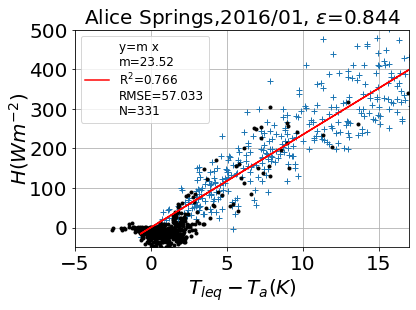

57.033267519906154
52.03522685737121


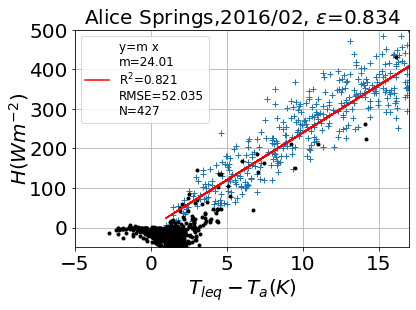

52.03522685737121
54.473347816569216


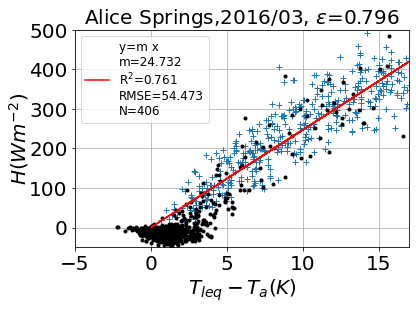

54.473347816569216
43.82396811107325


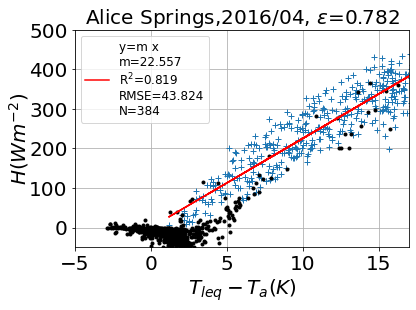

43.82396811107325
40.588112500844595


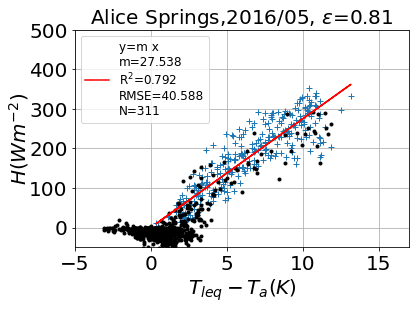

40.588112500844595
37.42936960367241


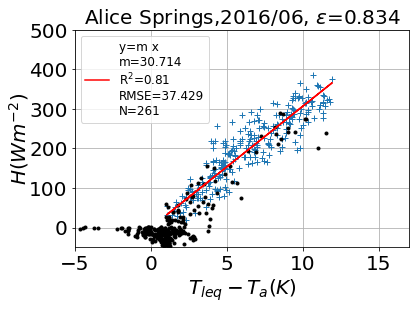

37.42936960367241


KeyboardInterrupt: 

In [96]:
site="Alice Springs"
df=asframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_as=[]
optslp_ign_as=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_as.append(opt_eps)
            opteps_ign_as.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_as.append(1)
            optslp_ign_as.append(np.nan)

plt.plot(np.arange(len(opteps_ign_as))+1,opteps_ign_as,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Howard Springs

46.58425384221706


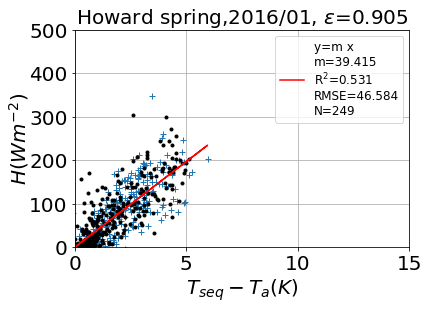

45.38916972053139


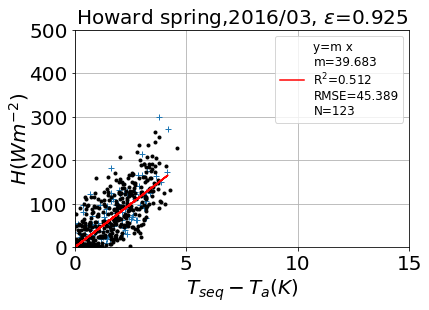

49.982866317642575


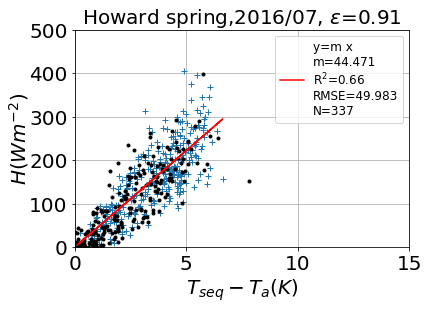

57.021811743341715


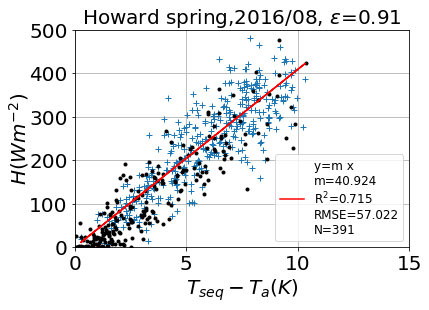

61.20158081421588


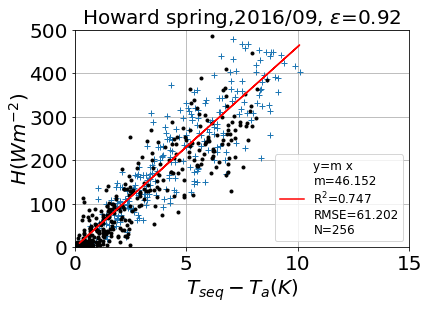

49.731900432610665


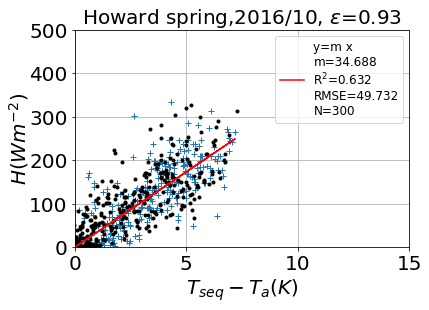

61.78206387333976


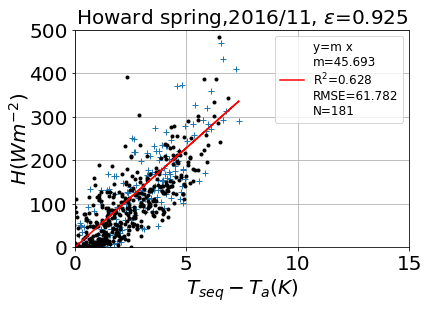

41.33407260634285


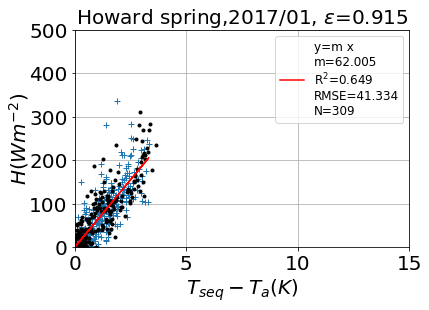

49.3504353418251


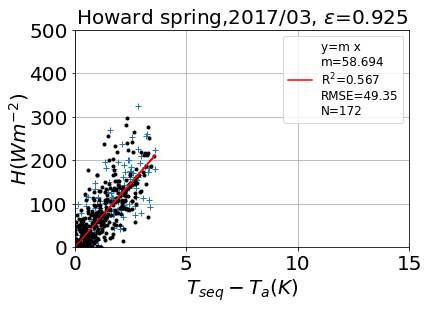

44.40050449969962


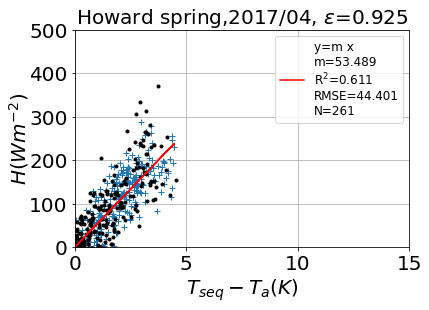

48.23814150905524


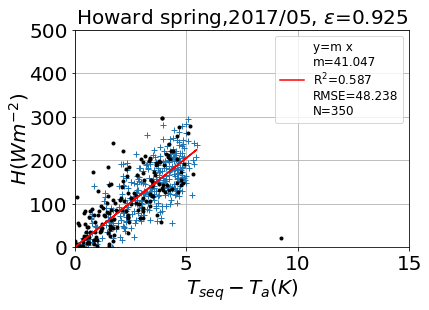

46.898578727028706


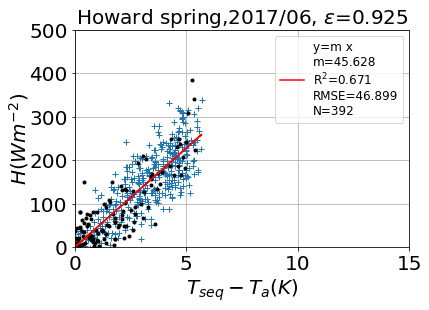

50.118598817063095


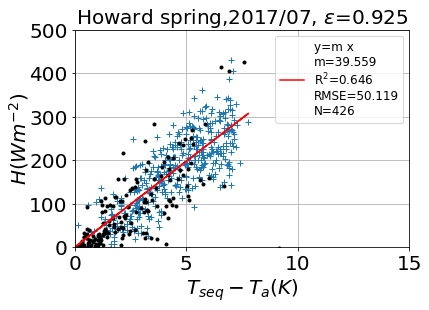

57.97181134882592


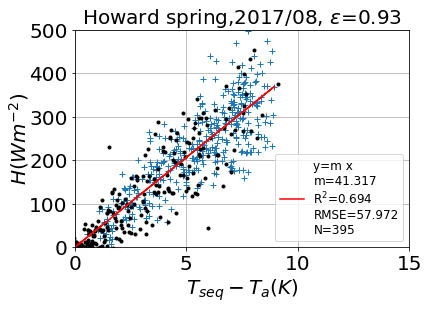

62.24048579195754


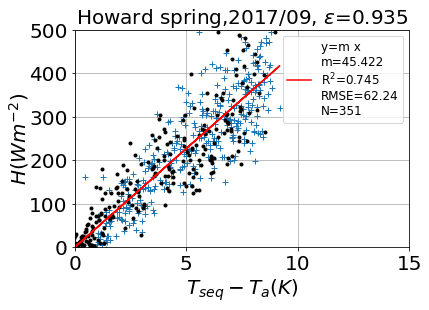

56.40897766778059


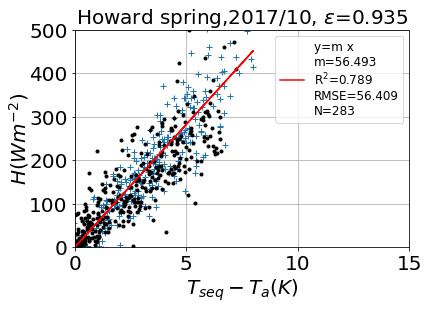

59.582002500633415


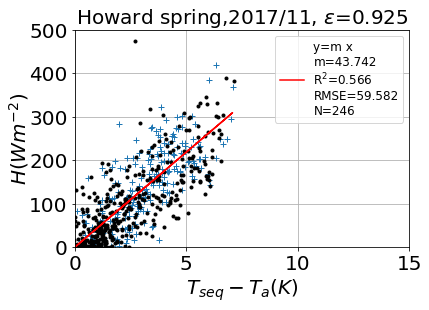

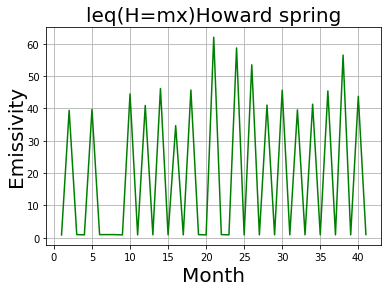

In [154]:
site="Howard spring"
df=hsframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_hs=[]
optslp_ign_hs=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_hs.append(opt_eps)
            opteps_ign_hs.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_hs.append(1)
            optslp_ign_hs.append(np.nan)

plt.plot(np.arange(len(opteps_ign_hs))+1,opteps_ign_hs,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Tumbarumba

61.62449544961063


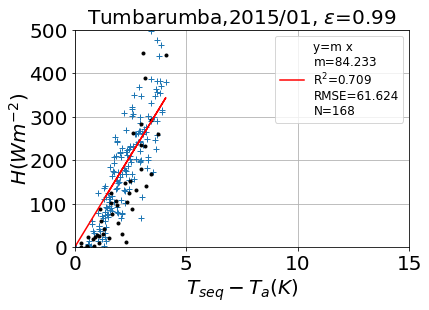

63.42599384026355


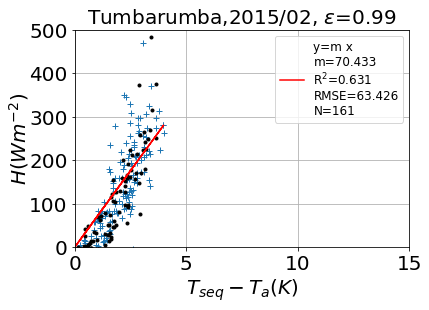

53.27854493309287


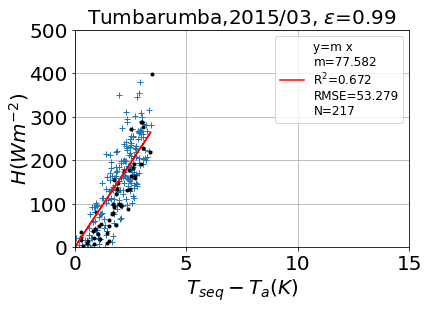

56.531787630012424


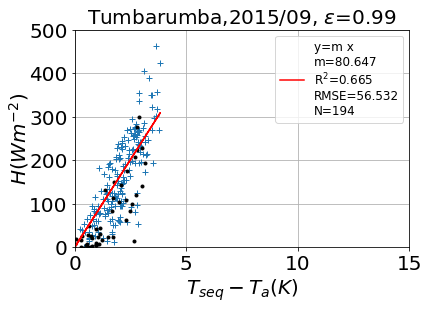

60.803038327022975


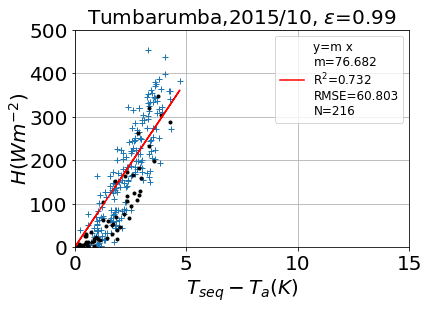

62.91070381276091


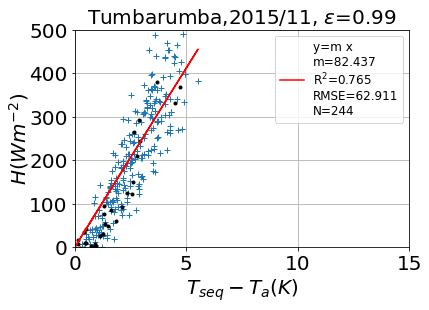

61.73244016491314


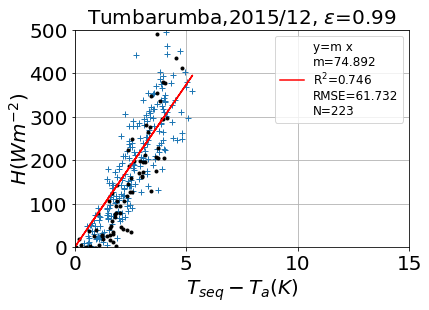

63.310789008169714


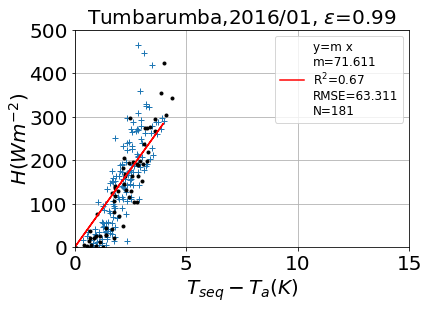

52.6690812702979


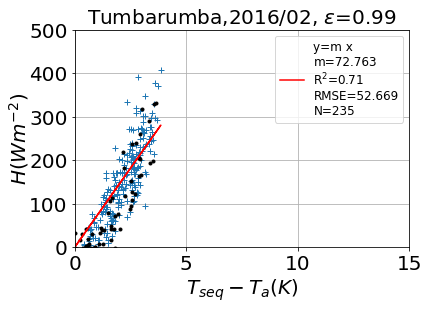

49.91331793841397


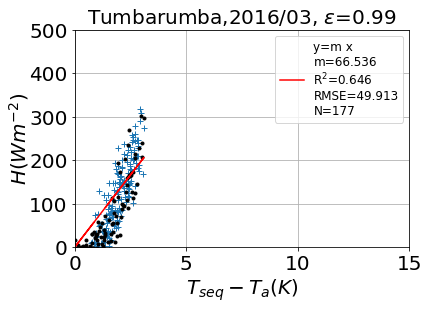

48.96137609183044


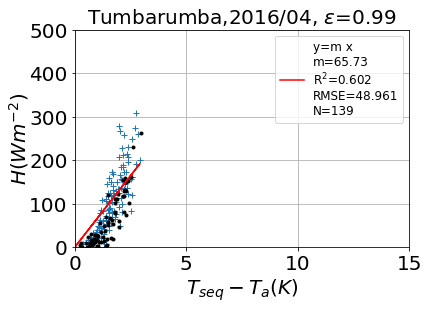

55.45008147566374


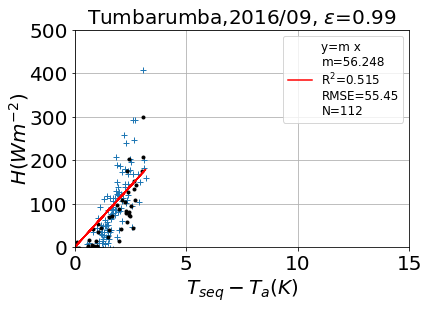

65.91371224283186


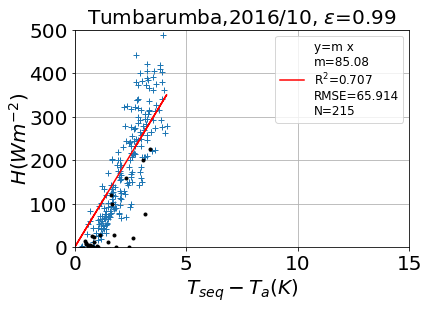

68.47937854241137


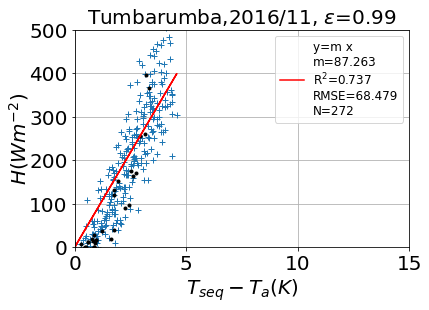

63.031761160658284


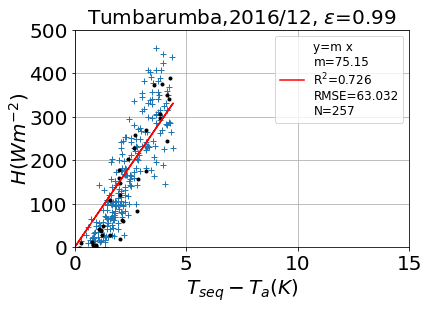

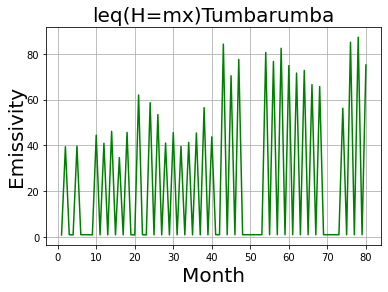

In [155]:
site="Tumbarumba"
df=tumframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_tum=[]
optslp_ign_tum=[]
for yr in range(2015,2017):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_hs.append(opt_eps)
            opteps_ign_hs.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_hs.append(1)
            optslp_ign_hs.append(np.nan)

plt.plot(np.arange(len(opteps_ign_hs))+1,opteps_ign_hs,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Litchfield

37.881043267781564


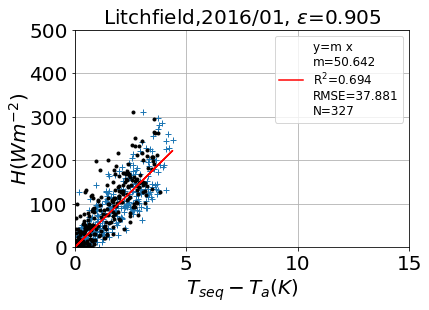

43.49473016456378


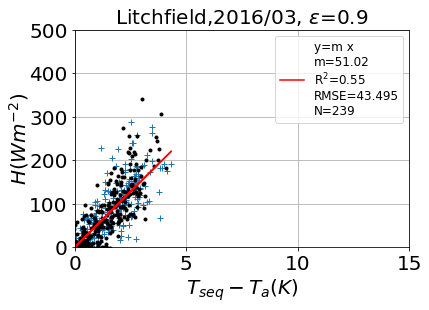

39.63331736232514


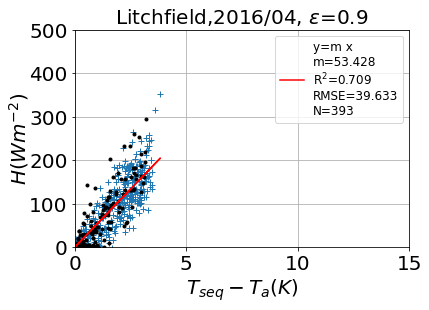

50.886723619821424


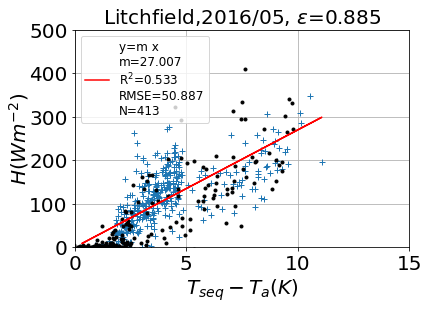

49.37756905977119


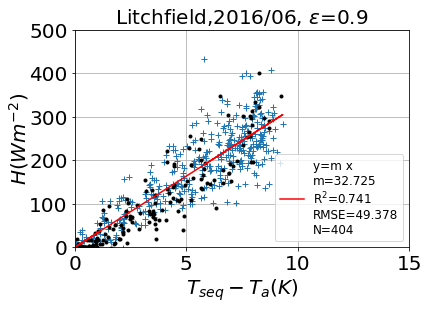

51.14498392002927


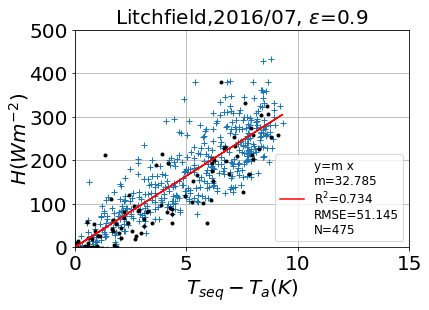

51.06467046407577


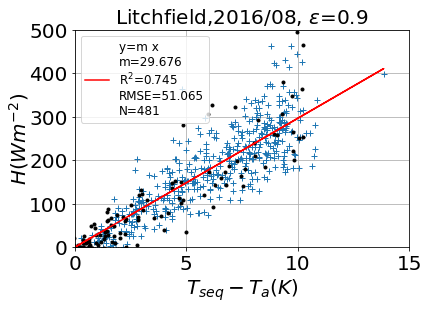

42.31242067362356


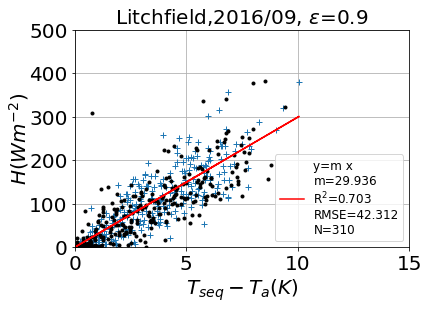

46.0925232962779


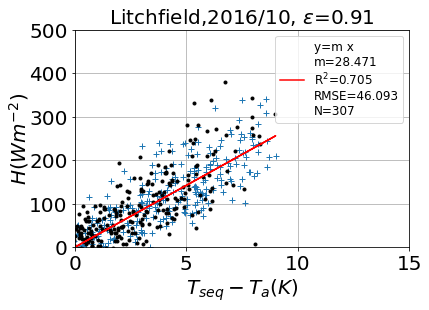

42.124864133331926


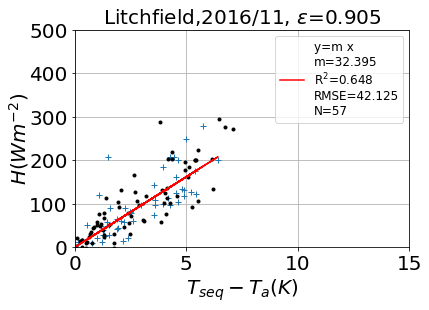

44.63835194364203


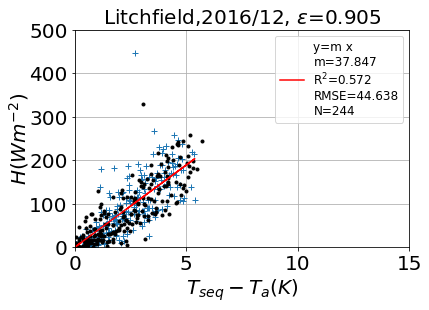

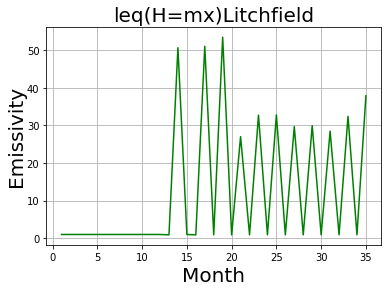

In [156]:
site="Litchfield"
df=lfframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_lf=[]
optslp_ign_lf=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_lf.append(opt_eps)
            opteps_ign_lf.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_lf.append(1)
            optslp_ign_lf.append(np.nan)

plt.plot(np.arange(len(opteps_ign_lf))+1,opteps_ign_lf,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Sturt Plains

37.881043267781564


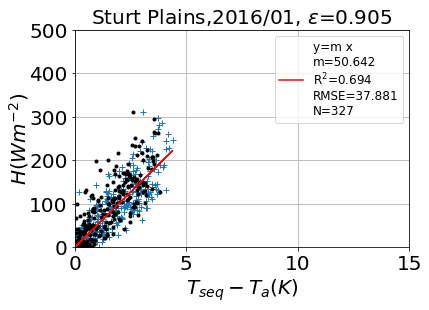

43.49473016456378


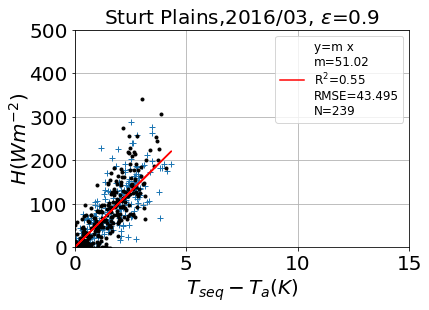

39.63331736232514


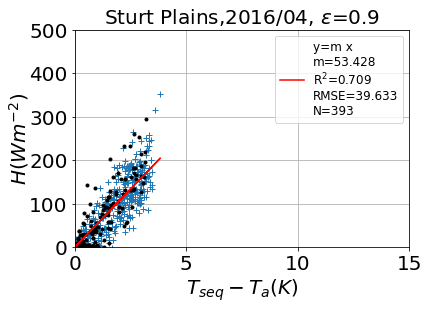

50.886723619821424


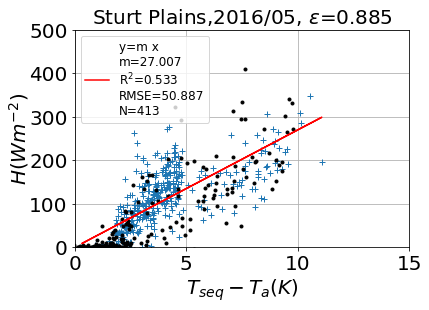

49.37756905977119


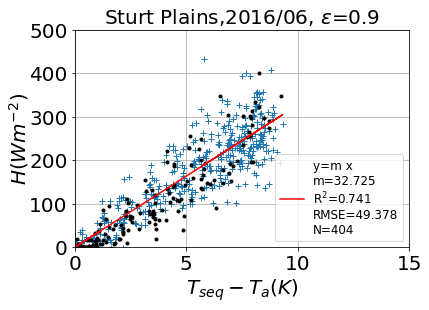

51.14498392002927


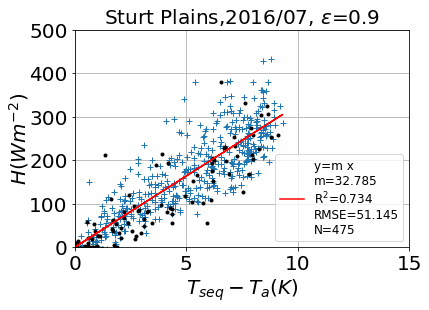

51.06467046407577


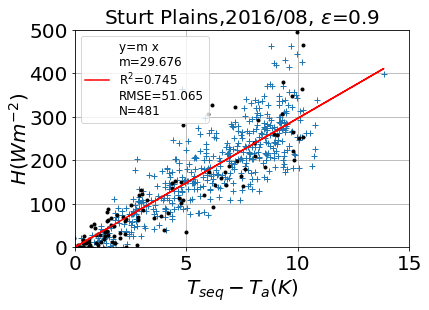

42.31242067362356


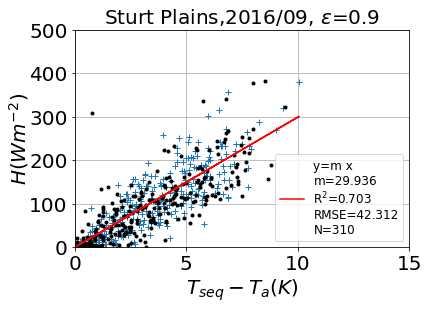

46.0925232962779


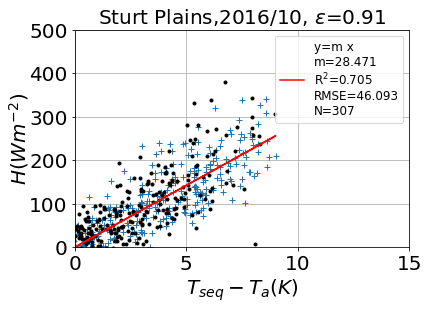

42.124864133331926


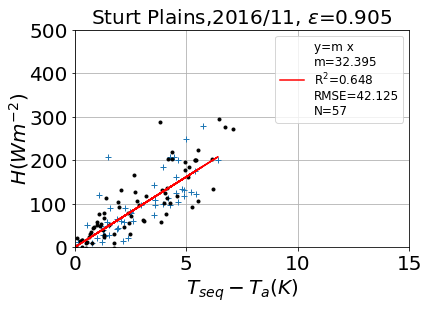

44.63835194364203


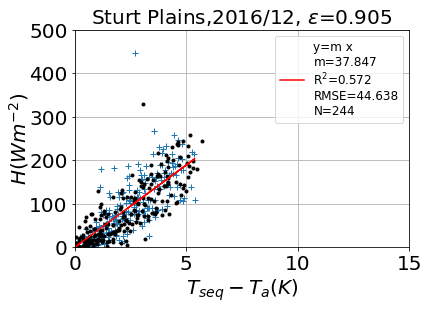

31.62502097285507


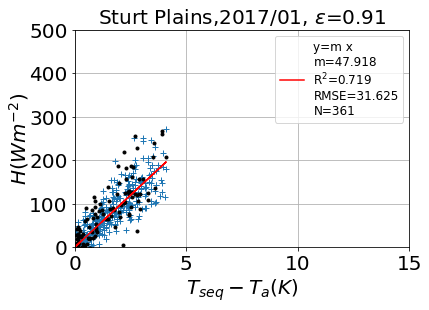

33.523623614894795


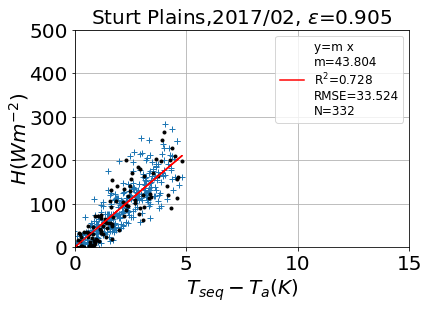

36.58618087452211


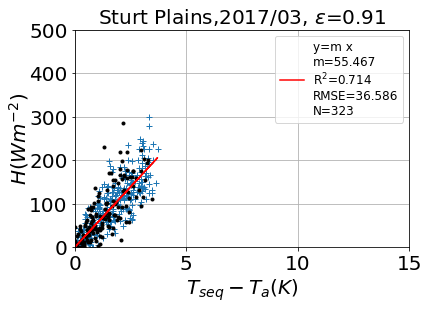

32.97681062916267


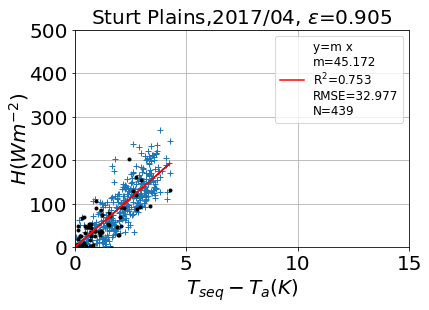

35.60100884116775


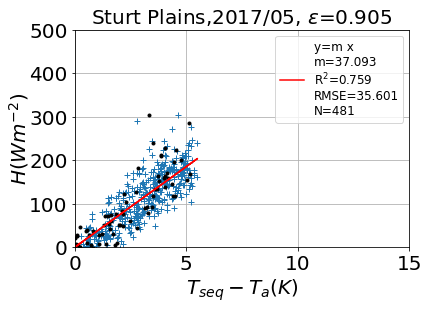

41.01269192983267


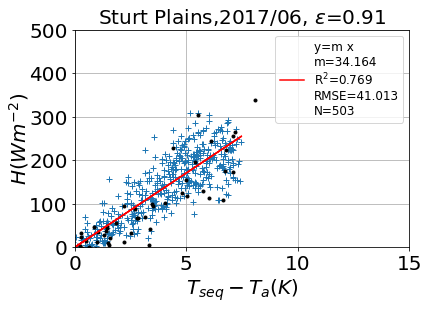

49.299223083751535


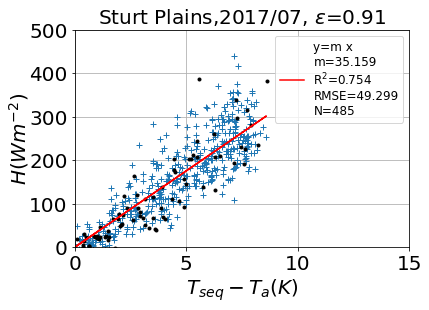

51.843030733454846


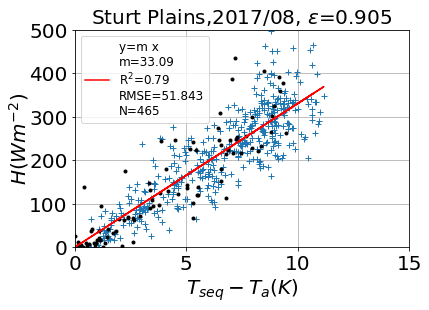

59.281896767740676


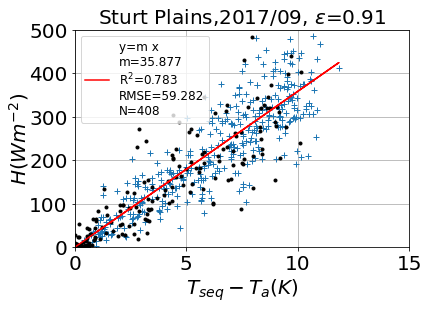

63.960832876026075


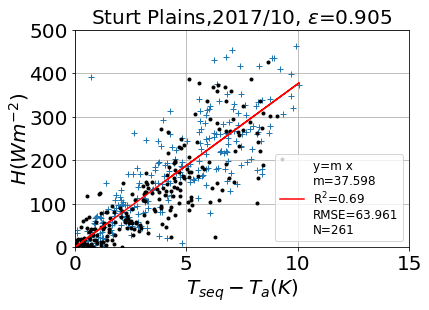

46.151615590139514


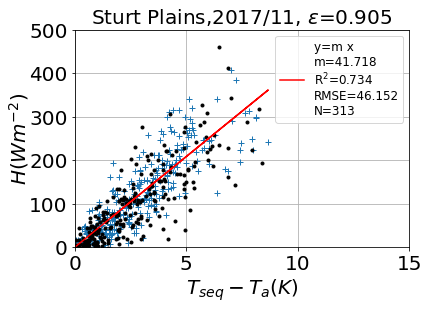

46.71031167844551


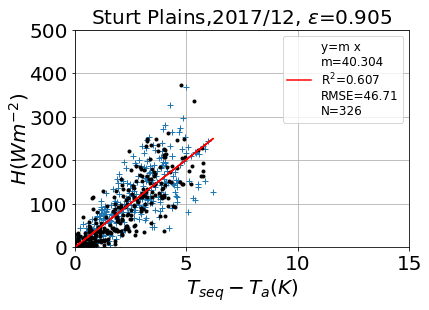

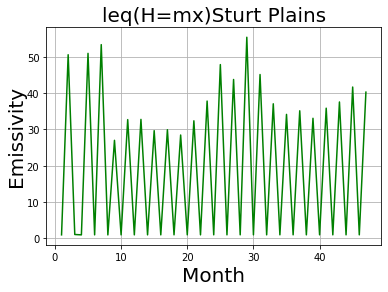

In [157]:
site="Sturt Plains"
df=lfframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_sp=[]
optslp_ign_sp=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_sp.append(opt_eps)
            opteps_ign_sp.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_sp.append(1)
            optslp_ign_sp.append(np.nan)

plt.plot(np.arange(len(opteps_ign_sp))+1,opteps_ign_sp,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Titree

54.9273849518318


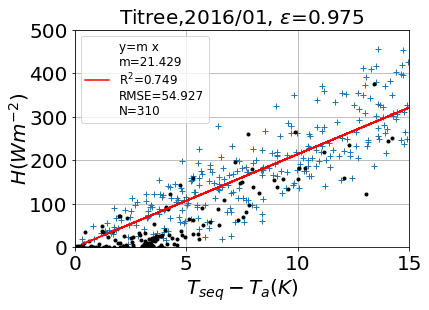

47.25631214075752


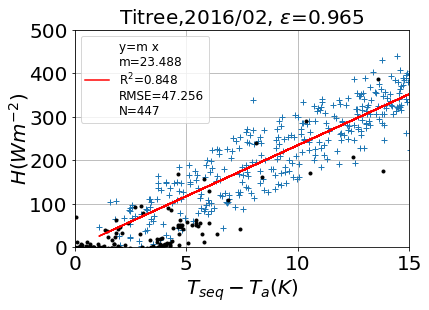

45.87018227238192


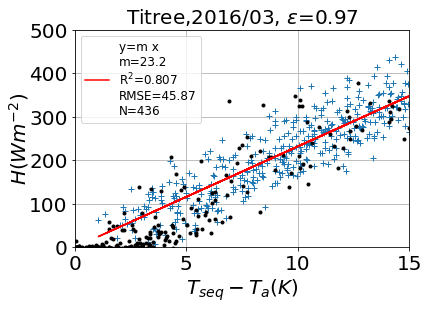

40.50446861323715


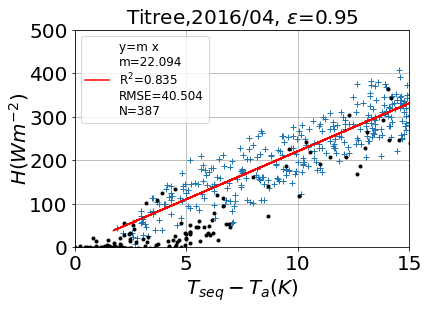

41.611308215784035


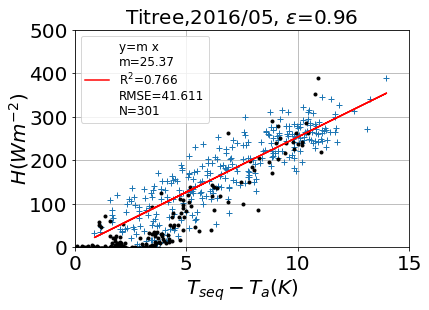

41.311490566928605


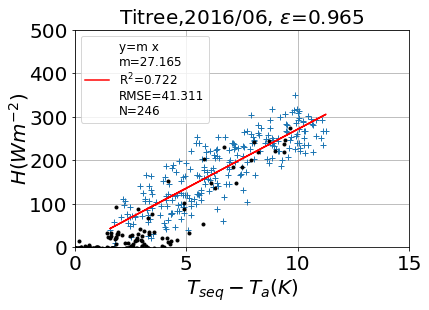

47.271618496190825


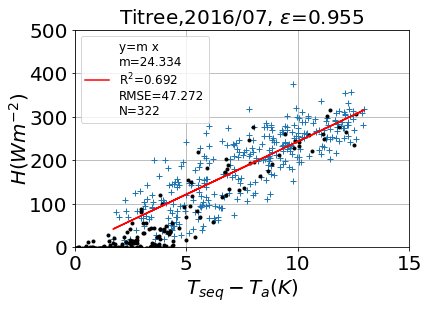

48.512214089253995


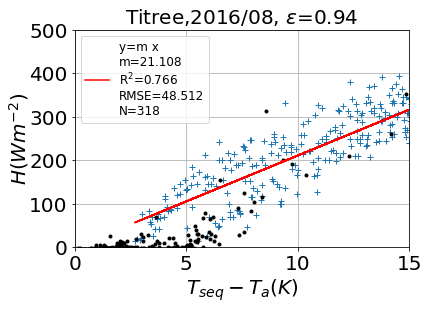

46.99707683112442


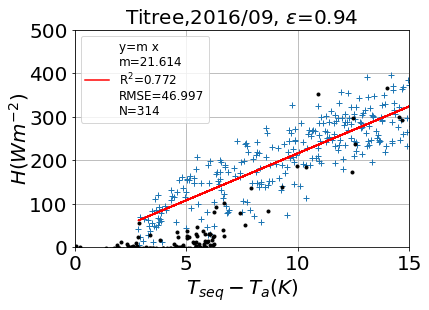

47.53750570323904


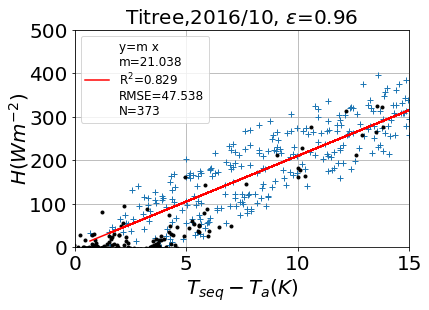

51.85682806156715


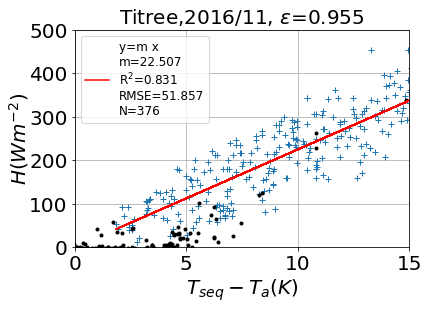

49.43596649981731


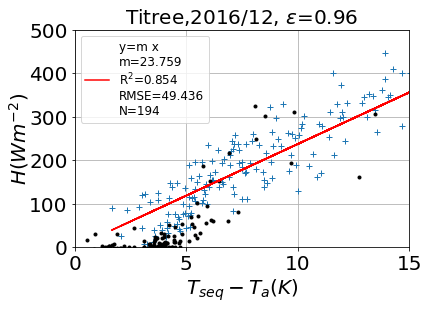

54.71807210502406


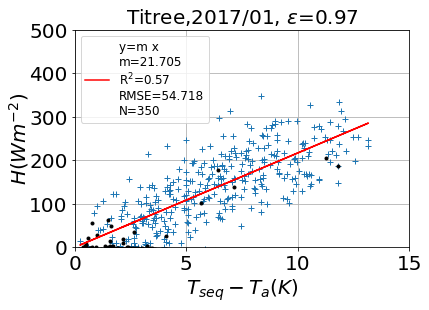

43.644874221779276


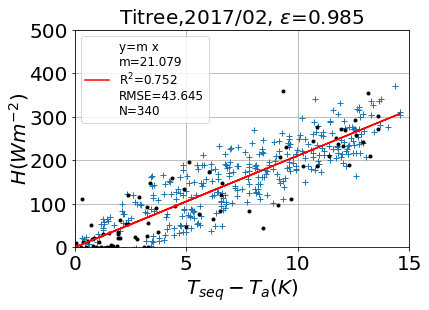

44.11566647480707


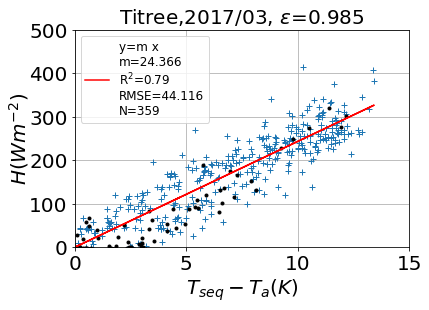

40.64204492363932


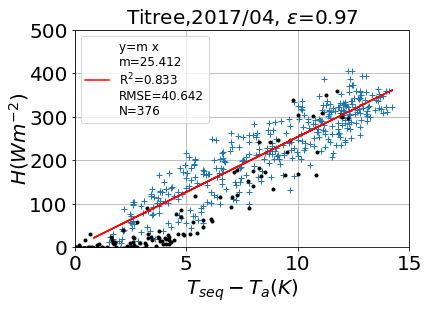

39.28038186518322


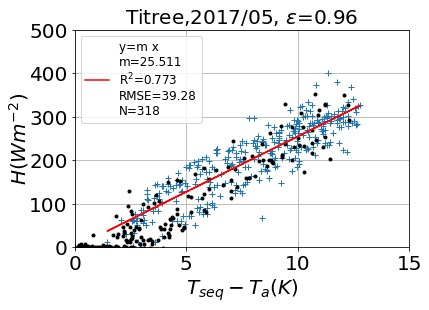

37.89109684126033


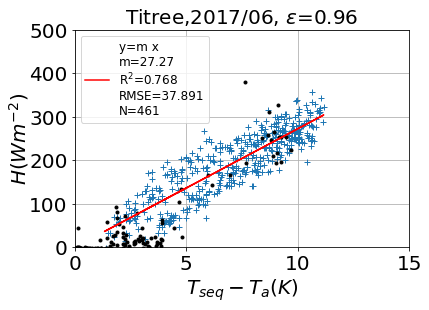

39.25913796276386


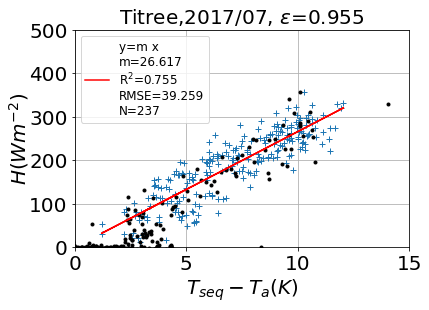

40.909127945419286


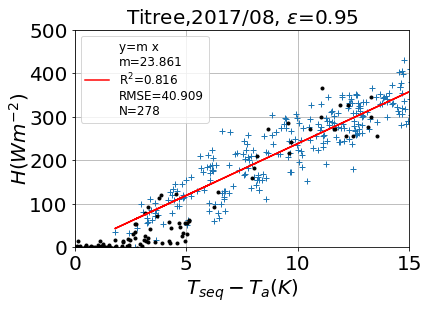

45.3038825016336


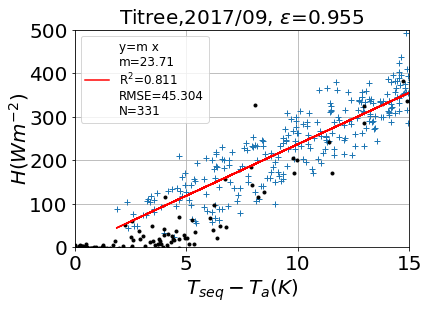

46.6126190989551


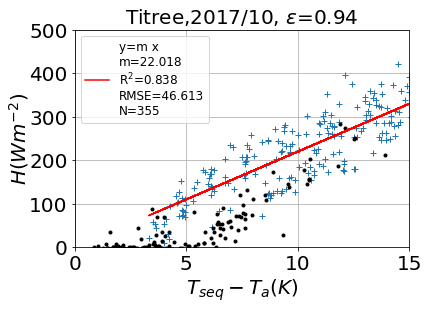

51.17894899079924


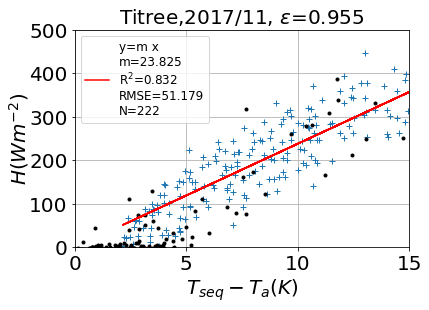

50.07733203426265


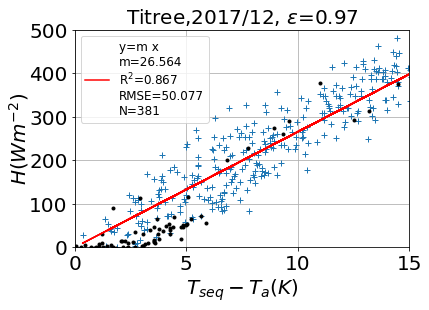

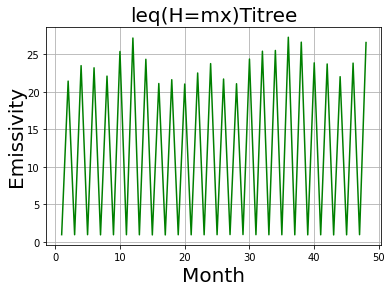

In [158]:
site="Titree"
df=titreeframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_tt=[]
optslp_ign_tt=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_tt.append(opt_eps)
            opteps_ign_tt.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_tt.append(1)
            optslp_ign_tt.append(np.nan)

plt.plot(np.arange(len(opteps_ign_tt))+1,opteps_ign_tt,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Dalyuncleared

39.025493090358445


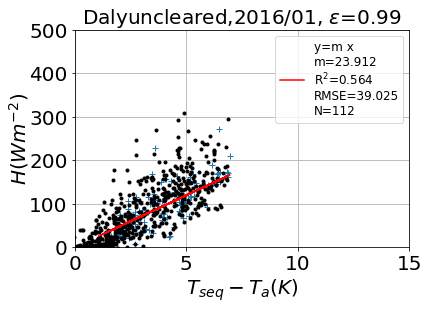

37.85782042915707


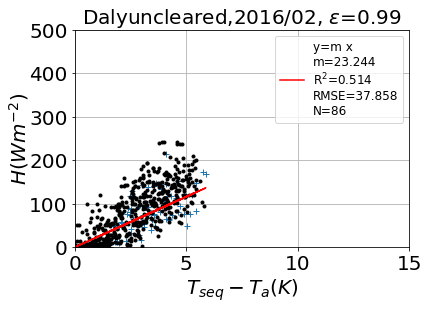

39.715448887335576


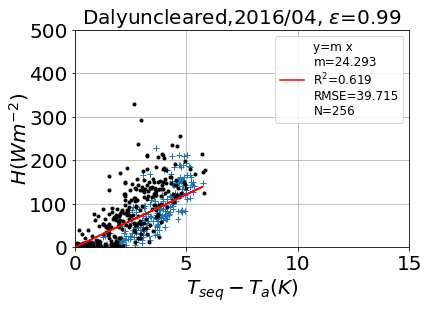

33.74246333829856


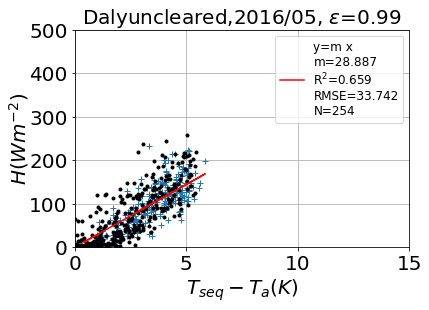

38.68130201866277


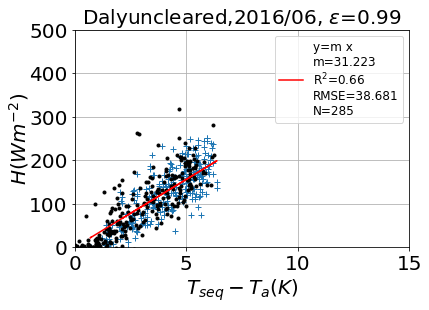

42.1187422116044


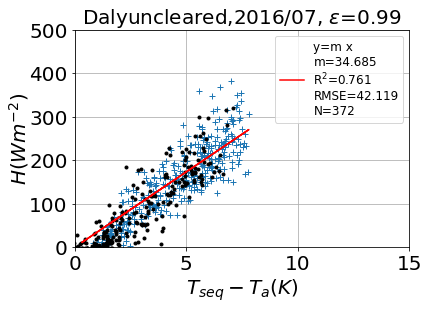

44.44127828096612


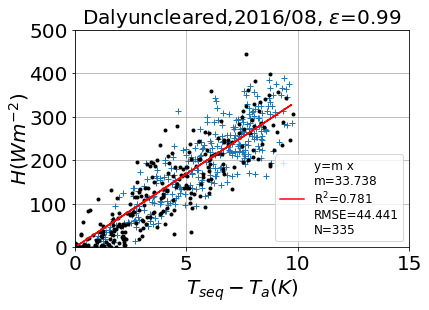

62.04201565650498


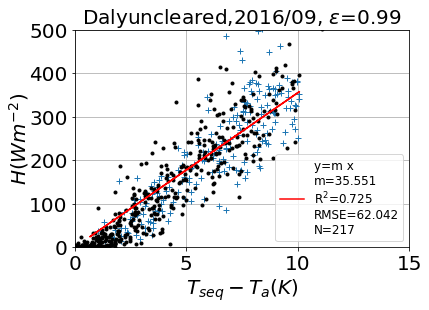

50.54912511798387


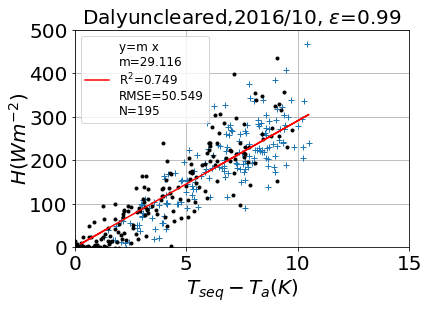

50.9379709849222


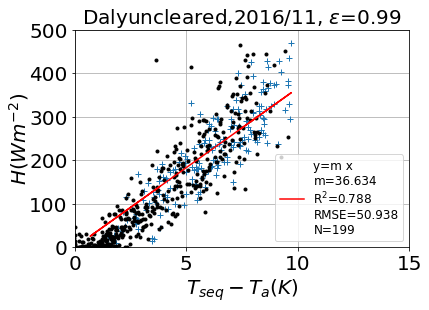

44.72741202044747


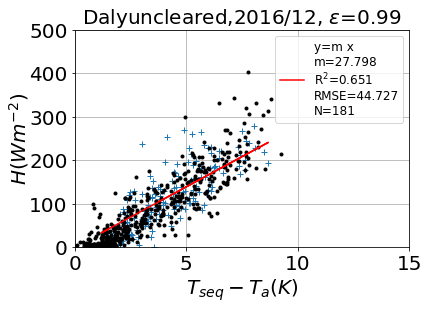

37.69514137032385


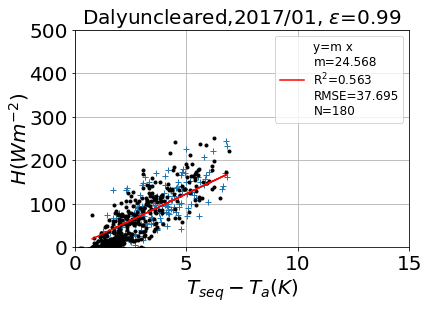

39.20655264970888


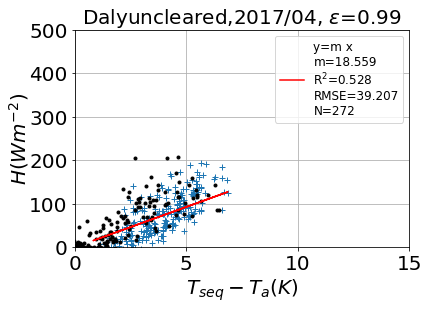

35.07629384594213


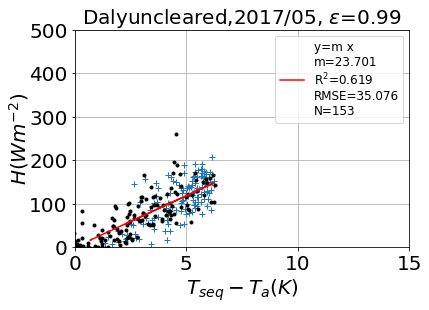

35.5646085786813


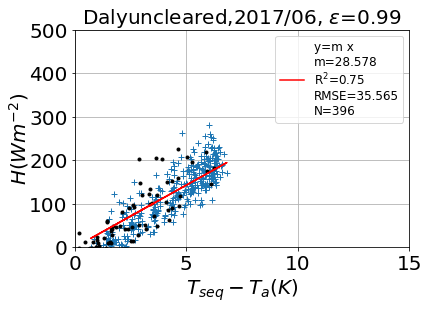

43.763226595634535


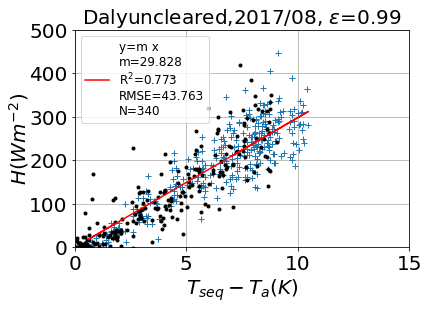

47.54067796757986


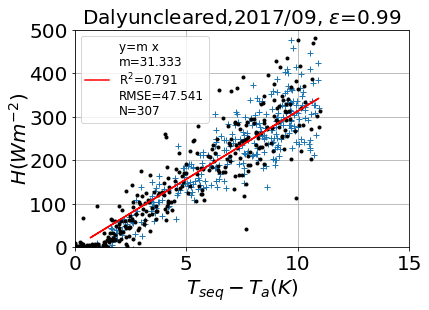

53.80483886320136


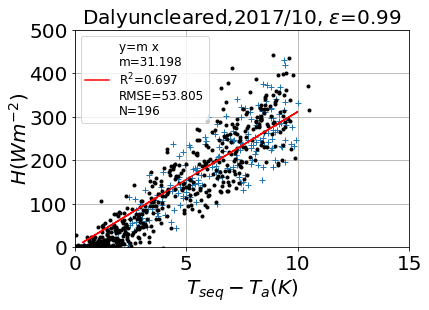

34.05606038074165


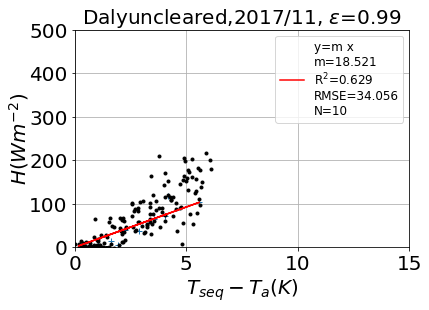

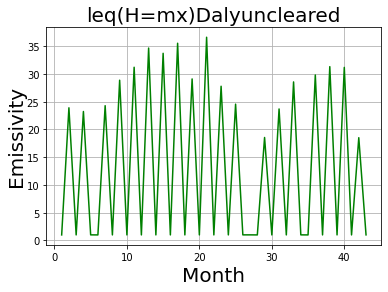

In [160]:
site="Dalyuncleared"
df=dalyuncframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_du=[]
optslp_ign_du=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_du.append(opt_eps)
            opteps_ign_du.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_du.append(1)
            optslp_ign_du.append(np.nan)

plt.plot(np.arange(len(opteps_ign_du))+1,opteps_ign_du,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()